In [166]:
#import needed libraries
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point, Polygon
import descartes
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas_profiling as pp
from sklearn.model_selection import train_test_split


%matplotlib inline

In [167]:
#reading csv data as pandas data frames
data_riders = pd.read_csv('Riders.csv')
data_test = pd.read_csv('Test.csv')
data_train = pd.read_csv('Train.csv')

In [168]:
#Getting some summary stats on the Train data
display(data_train.info(),data_train.describe(),data_train.head(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21201 entries, 0 to 21200
Data columns (total 29 columns):
Order No                                     21201 non-null object
User Id                                      21201 non-null object
Vehicle Type                                 21201 non-null object
Platform Type                                21201 non-null int64
Personal or Business                         21201 non-null object
Placement - Day of Month                     21201 non-null int64
Placement - Weekday (Mo = 1)                 21201 non-null int64
Placement - Time                             21201 non-null object
Confirmation - Day of Month                  21201 non-null int64
Confirmation - Weekday (Mo = 1)              21201 non-null int64
Confirmation - Time                          21201 non-null object
Arrival at Pickup - Day of Month             21201 non-null int64
Arrival at Pickup - Weekday (Mo = 1)         21201 non-null int64
Arrival at Pickup - Time   

None

Platform Type  Placement - Day of Month  Placement - Weekday (Mo = 1)  \
count   21201.000000              21201.000000                  21201.000000   
mean        2.752182                 15.653696                      3.240083   
std         0.625178                  8.798916                      1.567295   
min         1.000000                  1.000000                      1.000000   
25%         3.000000                  8.000000                      2.000000   
50%         3.000000                 15.000000                      3.000000   
75%         3.000000                 23.000000                      5.000000   
max         4.000000                 31.000000                      7.000000   

       Confirmation - Day of Month  Confirmation - Weekday (Mo = 1)  \
count                 21201.000000                     21201.000000   
mean                     15.653837                         3.240225   
std                       8.798886                         1.567228   
min                       1.000000                         1.000000   
25%                       8.000000                         2.000000   
50%                      15.000000                         3.000000   
75%                      23.000000                         5.000000   
max                      31.000000                         7.000000   

       Arrival at Pickup - Day of Month  Arrival at Pickup - Weekday (Mo = 1)  \
count                      21201.000000                          21201.000000   
mean                          15.653837                              3.240225   
std                            8.798886                              1.567228   
min                            1.000000                              1.000000   
25%                            8.000000                              2.000000   
50%                           15.000000                              3.000000   
75%                           23.000000                              5.000000   
max                           31.000000                              7.000000   

       Pickup - Day of Month  Pickup - Weekday (Mo = 1)  \
count           21201.000000               21201.000000   
mean               15.653837                   3.240225   
std                 8.798886                   1.567228   
min                 1.000000                   1.000000   
25%                 8.000000                   2.000000   
50%                15.000000                   3.000000   
75%                23.000000                   5.000000   
max                31.000000                   7.000000   

       Arrival at Destination - Day of Month  \
count                           21201.000000   
mean                               15.653837   
std                                 8.798886   
min                                 1.000000   
25%                                 8.000000   
50%                                15.000000   
75%                                23.000000   
max                                31.000000   

       Arrival at Destination - Weekday (Mo = 1)  Distance (KM)   Temperature  \
count                               21201.000000   21201.000000  16835.000000   
mean                                    3.240225       9.506533     23.258889   
std                                     1.567228       5.668963      3.615768   
min                                     1.000000       1.000000     11.200000   
25%                                     2.000000       5.000000     20.600000   
50%                                     3.000000       8.000000     23.500000   
75%                                     5.000000      13.000000     26.000000   
max                                     7.000000      49.000000     32.100000   

       Precipitation in millimeters    Pickup Lat   Pickup Long  \
count                    552.000000  21201.000000  21201.000000   
mean                       7.905797     -1.281470     36.811264   
std                 

Order No       User Id Vehicle Type  Platform Type  \
0   Order_No_4211   User_Id_633         Bike              3   
1  Order_No_25375  User_Id_2285         Bike              3   
2   Order_No_1899   User_Id_265         Bike              3   
3   Order_No_9336  User_Id_1402         Bike              3   
4  Order_No_27883  User_Id_1737         Bike              1   
5   Order_No_7408  User_Id_1342         Bike              3   
6  Order_No_22680  User_Id_2803         Bike              3   
7  Order_No_21578  User_Id_1075         Bike              3   
8   Order_No_5234   User_Id_733         Bike              3   
9   Order_No_1768  User_Id_2112         Bike              3   

  Personal or Business  Placement - Day of Month  \
0             Business                         9   
1             Personal                        12   
2             Business                        30   
3             Business                        15   
4             Personal                        13   
5             Business                        14   
6             Business                         9   
7             Business                        11   
8             Business                        30   
9             Business                        23   

   Placement - Weekday (Mo = 1) Placement - Time  Confirmation - Day of Month  \
0                             5       9:35:46 AM                            9   
1                             5      11:16:16 AM                           12   
2                             2      12:39:25 PM                           30   
3                             5       9:25:34 AM                           15   
4                             1       9:55:18 AM                           13   
5                             5       3:07:35 PM                           14   
6                             5       9:33:45 AM                            9   
7                             1       2:13:01 PM                           11   
8                             2      11:10:44 AM                           30   
9                             5       4:48:54 PM                           23   

   Confirmation - Weekday (Mo = 1)  ... Arrival at Destination - Time  \
0                                5  ...                   10:39:55 AM   
1                                5  ...                   12:17:22 PM   
2                                2  ...                    1:00:38 PM   
3                                5  ...                   10:05:27 AM   
4                                1  ...                   10:25:37 AM   
5                                5  ...                    4:23:41 PM   
6                                5  ...                   10:19:45 AM   
7                                1  ...                    2:33:26 PM   
8                                2  ...                    1:19:35 PM   
9                                5  ...                    6:31:57 PM   

   Distance (KM)  Temperature Precipitation in millimeters  Pickup Lat  \
0              4         20.4                          NaN   -1.317755   
1             16         26.4                          NaN   -1.351453   
2              3          NaN                          NaN   -1.308284   
3              9         19.2                          NaN   -1.281301   
4              9         15.4                          NaN   -1.266597   
5              9         27.2                          NaN   -1.302583   
6              5         20.3                          NaN   -1.279395   
7              3         28.7                          NaN   -1.252796   
8              9          NaN                          NaN   -1.255189   
9             14         24.6                          NaN   -1.225322   

   Pickup Long Destination Lat  Destination Long      Rider Id  \
0    36.830370       -1.300406         36.829741  Rider_Id_432   
1    36.899315       -1.295004         36.814358  Rider_Id_856   
2    36.843419       -1.300921   

In [169]:
#Getting some summary stats on the Riders data
display(data_riders.info(),data_riders.describe(),data_riders.sample(10))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 960 entries, 0 to 959
Data columns (total 5 columns):
Rider Id          960 non-null object
No_Of_Orders      960 non-null int64
Age               960 non-null int64
Average_Rating    960 non-null float64
No_of_Ratings     960 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 37.6+ KB


None

No_Of_Orders          Age  Average_Rating  No_of_Ratings
count    960.000000   960.000000      960.000000     960.000000
mean    1864.851042  1200.234375       13.412604     427.983333
std     1880.337785   810.930171        2.675794     486.957931
min        2.000000    96.000000        0.000000       0.000000
25%      261.750000   478.250000       13.500000      30.000000
50%     1475.500000  1021.000000       14.000000     223.000000
75%     2847.250000  1891.500000       14.300000     678.750000
max     9756.000000  3764.000000       15.200000    2298.000000

Rider Id  No_Of_Orders   Age  Average_Rating  No_of_Ratings
424  Rider_Id_612           730   642            14.0             80
221  Rider_Id_186            40   880            14.7             21
546  Rider_Id_164          3737  1884            14.2           1054
673  Rider_Id_901          2186  1131            13.9            570
907  Rider_Id_821            94   155            14.6             15
224  Rider_Id_561          1926  1327            12.9            620
594  Rider_Id_557          2168   941            14.1            409
774  Rider_Id_318           293   305            14.5             36
213  Rider_Id_417             5   875             0.0              1
784  Rider_Id_653           576  1822            12.7            159

# Question 1
 • Set up a Zindi account (www.Zindi.Africa) and share with the TA’s and instructors. 
 You’ll submit your solutions to Zindi using the sample submission.
 
 Zindi account name :  NanaSekum

# Question 2
• Prepare a comprehensive exploratory data analysis (EDA) using the training dataset.   
• The EDA should include joining the different tables (train and riders), exploring the shape of the data,           checking correlation matrix, simple and complex plots like heat map and KDE, summary statistics etc.

In [5]:
# Overview of the Train data
report_train1=pp.ProfileReport(data_train)
report_train1

Following the warnings pesented by the overview,the timestamps that are recorded as strings are going to be pursed to pandas datetimes with pd.to_datetime()

In [170]:
#converting the strings to timestamps
#data_train[['Placement - Time','Arrival at Destination - Time']] = data_train[['Placement - Time','Arrival at Destination - Time']].apply(pd.to_datetime)

display(data_train.sample(5))

'''
Note: All fields with values been timestamps has the string 'Time' attached to the field name 
        so I changed the idea of pursing the string to a datetime in pandas into a loop.
'''
for times in data_train:
    if '-_Time' in times:
        data_train[times]=pd.to_datetime(data_train[times])
report_train2 = pp.ProfileReport(data_train)        
display(report_train2)

Order No       User Id Vehicle Type  Platform Type  \
12110  Order_No_23506   User_Id_186         Bike              3   
16965  Order_No_25691  User_Id_3688         Bike              3   
16027   Order_No_6926  User_Id_2989         Bike              3   
17819  Order_No_28139   User_Id_136         Bike              3   
16634  Order_No_14385   User_Id_554         Bike              1   

      Personal or Business  Placement - Day of Month  \
12110             Business                         5   
16965             Business                         3   
16027             Business                        11   
17819             Business                         5   
16634             Personal                        23   

       Placement - Weekday (Mo = 1) Placement - Time  \
12110                             5      11:03:02 AM   
16965                             3       3:28:43 PM   
16027                             5       1:22:21 PM   
17819                             2       9:46:12 AM   
16634                             3      10:12:10 AM   

       Confirmation - Day of Month  Confirmation - Weekday (Mo = 1)  ...  \
12110                            5                                5  ...   
16965                            3                                3  ...   
16027                           11                                5  ...   
17819                            5                                2  ...   
16634                           23                                3  ...   

      Arrival at Destination - Time  Distance (KM)  Temperature  \
12110                   11:44:58 AM              6         24.6   
16965                    4:35:55 PM             10         28.2   
16027                    2:32:50 PM             19         26.3   
17819                   11:02:15 AM              4         21.6   
16634                   10:49:22 AM              8         21.8   

      Precipitation in millimeters  Pickup Lat  Pickup Long Destination Lat  \
12110                          NaN   -1.282582    36.809235       -1.257147   
16965                          NaN   -1.228583    36.882647       -1.273647   
16027                          NaN   -1.356237    36.904295       -1.347207   
17819                          NaN   -1.316959    36.700003       -1.332617   
16634                          NaN   -1.294276    36.796975       -1.269059   

       Destination Long      Rider Id Time from Pickup to Arrival  
12110         36.795063  Rider_Id_576                         944  
16965         36.816404   Rider_Id_76                        1365  
16027         36.769264  Rider_Id_114                        1582  
17819         36.714623  Rider_Id_116                         545  
16634         36.810803  Rider_Id_726                         922  

[5 rows x 29 columns]

In [171]:
#looking out for common fields to use as key in joining the two data sets
data_train.columns=data_train.columns.str.replace('_',' ')
display(data_riders.columns,data_train.columns)

Index(['Rider Id', 'No_Of_Orders', 'Age', 'Average_Rating', 'No_of_Ratings'], dtype='object')

Index(['Order No', 'User Id', 'Vehicle Type', 'Platform Type',
       'Personal or Business', 'Placement - Day of Month',
       'Placement - Weekday (Mo = 1)', 'Placement - Time',
       'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)',
       'Confirmation - Time', 'Arrival at Pickup - Day of Month',
       'Arrival at Pickup - Weekday (Mo = 1)', 'Arrival at Pickup - Time',
       'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Pickup - Time',
       'Arrival at Destination - Day of Month',
       'Arrival at Destination - Weekday (Mo = 1)',
       'Arrival at Destination - Time', 'Distance (KM)', 'Temperature',
       'Precipitation in millimeters', 'Pickup Lat', 'Pickup Long',
       'Destination Lat', 'Destination Long', 'Rider Id',
       'Time from Pickup to Arrival'],
      dtype='object')

In [172]:
# with the possibility of oversigths just looking through for common fields seems not to be a good option. 
# so I check out the common fields as
for field in data_riders.columns:
    if field in data_train.columns:
        print(field)

Rider Id


In [173]:
# The common field 'Rider Id' is going to used as key for joining the two data
data_train_riders = pd.merge(data_train,data_riders, on = 'Rider Id')
data_test_riders = pd.merge(data_test,data_riders, on = 'Rider Id')

for times in data_train_riders:
    if '-Time' in times:
        data_train_riders[times]=pd.to_datetime(data_train_riders[times])
data_train_riders.sample(5)

Order No       User Id Vehicle Type  Platform Type  \
12977  Order_No_26214  User_Id_1329         Bike              3   
165    Order_No_15142   User_Id_865         Bike              3   
5397    Order_No_8410  User_Id_1406         Bike              1   
6653    Order_No_8163  User_Id_1882         Bike              3   
6102   Order_No_13836  User_Id_3264         Bike              3   

      Personal or Business  Placement - Day of Month  \
12977             Business                        28   
165               Business                        14   
5397              Personal                         7   
6653              Business                        22   
6102              Business                        12   

       Placement - Weekday (Mo = 1) Placement - Time  \
12977                             3      12:33:43 PM   
165                               2       9:01:39 AM   
5397                              4      11:04:39 AM   
6653                              4       5:05:13 PM   
6102                              5       2:45:32 PM   

       Confirmation - Day of Month  Confirmation - Weekday (Mo = 1)  ...  \
12977                           28                                3  ...   
165                             14                                2  ...   
5397                             7                                4  ...   
6653                            22                                4  ...   
6102                            12                                5  ...   

      Pickup Lat  Pickup Long  Destination Lat Destination Long      Rider Id  \
12977  -1.273056    36.811298        -1.295695        36.812924   Rider_Id_45   
165    -1.245641    36.795530        -1.344215        36.919998  Rider_Id_155   
5397   -1.273701    36.806912        -1.288335        36.814849  Rider_Id_116   
6653   -1.295878    36.792812        -1.316704        36.699772  Rider_Id_685   
6102   -1.255189    36.782203        -1.288246        36.816454  Rider_Id_709   

       Time from Pickup to Arrival No_Of_Orders  Age  Average_Rating  \
12977                          827         1988  972            14.3   
165                           2702         1023  242            12.5   
5397                           927          705  874            14.3   
6653                          2136          487  560            13.7   
6102                          1314         1023  294            14.2   

      No_of_Ratings  
12977           358  
165             114  
5397            176  
6653             44  
6102            145  

[5 rows x 33 columns]

In [174]:
data_train_riders.shape

(21201, 33)

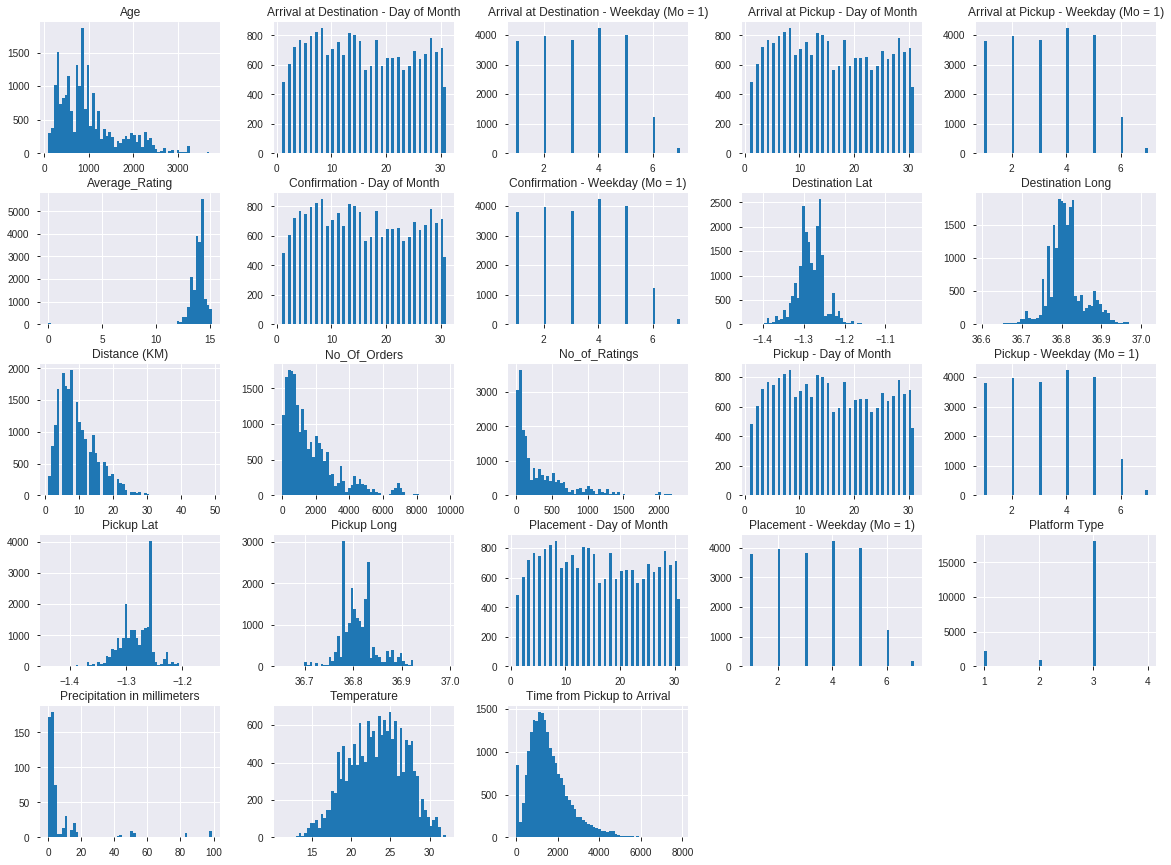

In [175]:
#Distribution across features
data_train_riders.hist(bins = 60, figsize = (20, 15))
plt.show()

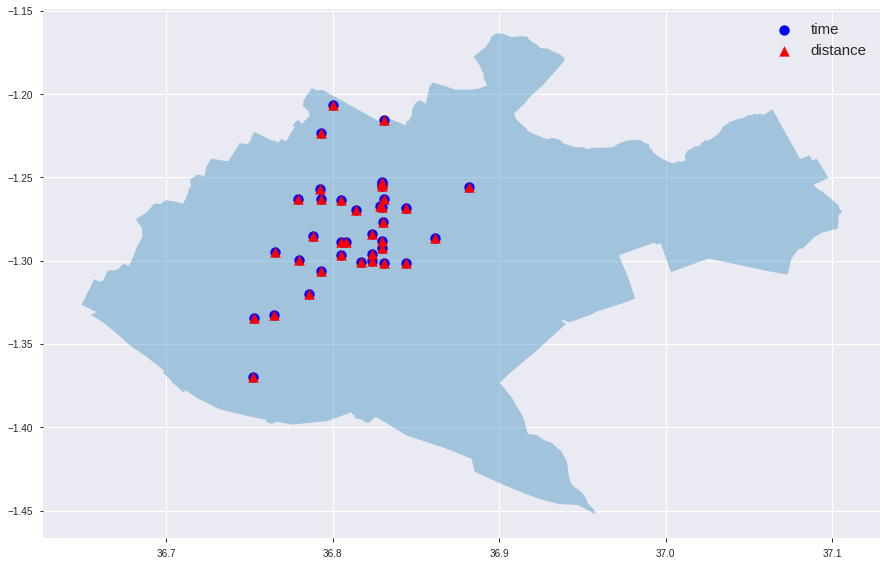

In [12]:
street_map = gpd.read_file('KEN-3_outline.shp')
fig,ax = plt.subplots(figsize = (15,15))
street_map.plot(ax=ax,alpha = 0.4)
crs = {'int': 'epsg:4326'}
geometry1 = [Point(xy) for xy in zip(data_train["Pickup Long"],data_train["Pickup Lat"])]
geometry2 = [Point(xy) for xy in zip(data_train_riders["Destination Long"],data_train["Destination Lat"])]

geo_df = gpd.GeoDataFrame(data_train_riders, #specifying the data
                                 crs=crs, #specifying the cordinate refernce system
                                 geometry =geometry2) #specifying the geometry list created
#geo_df2 = gpd.GeoDataFrame(data_train_riders, #specifying the data
#                                 crs=crs, #specifying the cordinate refernce system
 #                                geometry =geometry2) #specifying the geometry list created
geo_df[geo_df['Time from Pickup to Arrival'] == 1].plot(ax=ax, markersize = 100, color = 'blue', marker = 'o',label ='time')
geo_df[geo_df['Time from Pickup to Arrival'] == 1].plot(ax=ax, markersize = 100, color = 'red', marker = '^',label = 'distance')

#geo_df[geo_df2['Time from Pickup to Arrival'] == 1].plot(ax=ax, markersize = 100, color = 'green', marker = 'o',label ='time')
#geo_df[geo_df2['Distance (KM)'] == 1].plot(ax=ax, markersize = 100, color = 'yellow', marker = '^',label = 'distance')

plt.legend(prop={'size': 15})

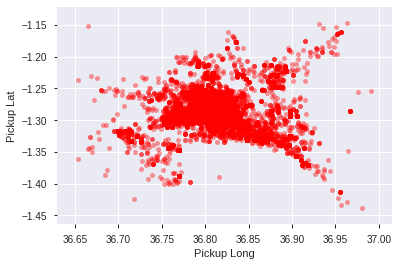

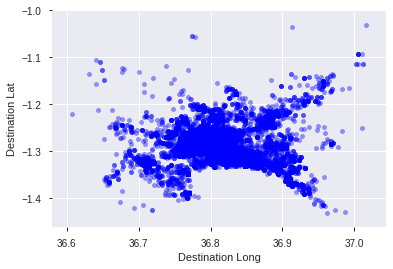

In [13]:
train_df = data_train
data_train.plot(kind="scatter", x="Pickup Long", y="Pickup Lat", alpha=0.4, color = 'red')
data_train.plot(kind="scatter", x="Destination Long", y="Destination Lat", alpha=0.4, color='blue')

plt.show()

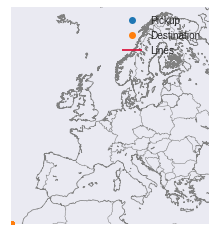

In [22]:
import random
from matplotlib.collections import LineCollection
from mpl_toolkits.basemap import Basemap
from matplotlib.collections import LineCollection

m = Basemap(llcrnrlon=-12,llcrnrlat=30,urcrnrlon=50,urcrnrlat=69.,
             resolution='i', projection='tmerc', lat_0 = 48.9, lon_0 = 15.3)

m.drawcoastlines(linewidth=0.72, color='gray')
m.drawcountries(zorder=0, color='gray')

lon1, lat1 = m(data_train["Pickup Long"].values,data_train["Pickup Lat"].values)
lon2, lat2 = m(data_train["Destination Long"].values,data_train["Destination Lat"].values)

pts = np.c_[lon1, lat1, lon2, lat2].reshape(len(lon1), 2, 2)
plt.gca().add_collection(LineCollection(pts, color="crimson", label="Lines"))

m.plot(lon1/1000000, lat1/1000000, marker="o", ls="", label="Pickup")
m.plot(lon2/1000000, lat2/1000000, marker="o", ls="", label="Destination")

plt.legend()
plt.show()



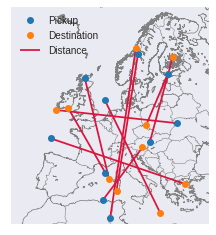

In [23]:
#I wanted to plot the plot both the pickup and destination points on a real map to visualize the distances covered 
#using lines like in the tested by the cordinated below, but I could not resize the map well to achieve my aim. ope to work on it another time

df = pd.DataFrame({"lon1" : np.random.randint(-15,30,10),
                   "lat1" : np.random.randint(33,66,10),
                   "lon2" : np.random.randint(-15,30,10),
                   "lat2" : np.random.randint(33,66,10)})

m = Basemap(llcrnrlon=-12,llcrnrlat=30,urcrnrlon=50,urcrnrlat=69.,
             resolution='i', projection='tmerc', lat_0 = 48.9, lon_0 = 15.3)

m.drawcoastlines(linewidth=0.72, color='gray')
m.drawcountries(zorder=0, color='gray')

lon1, lat1 = m(df.lon1.values, df.lat1.values)
lon2, lat2 = m(df.lon2.values, df.lat2.values)

pts = np.c_[lon1, lat1, lon2, lat2].reshape(len(lon1), 2, 2)
plt.gca().add_collection(LineCollection(pts, color="crimson", label="Distance"))

m.plot(lon1, lat1, marker="o", ls="", label="Pickup")
m.plot(lon2, lat2, marker="o", ls="", label="Destination")

plt.legend()
plt.show()

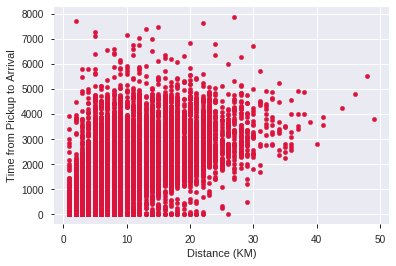

In [37]:
#Correlation plot of Time from Pickup to Arrival and Distance
data_train_riders.plot(kind = 'scatter', x = 'Distance (KM)', y = 'Time from Pickup to Arrival', color="crimson")

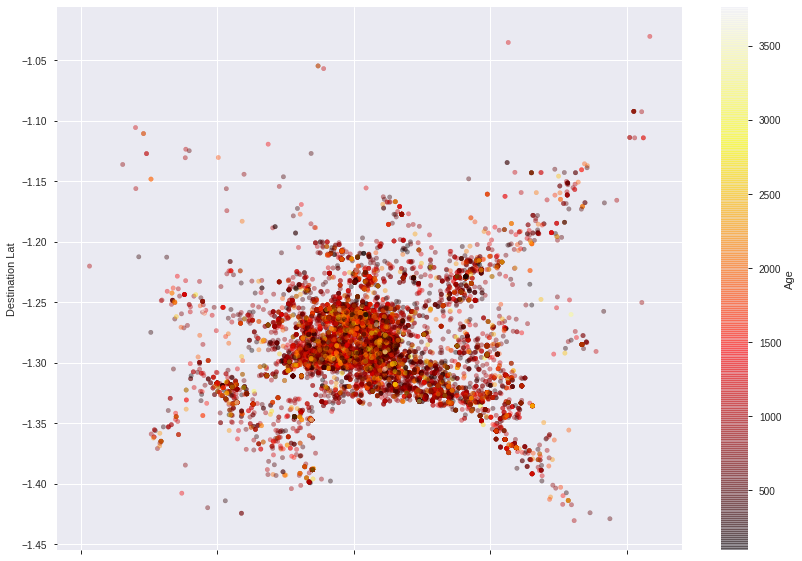

In [38]:
##GIS plot of Destination of product and Age
data_train_riders.plot(kind = "scatter", x = "Destination Long", y = "Destination Lat", alpha = 0.4,
             c = "Age", cmap = plt.get_cmap('hot'), figsize = (14, 10))

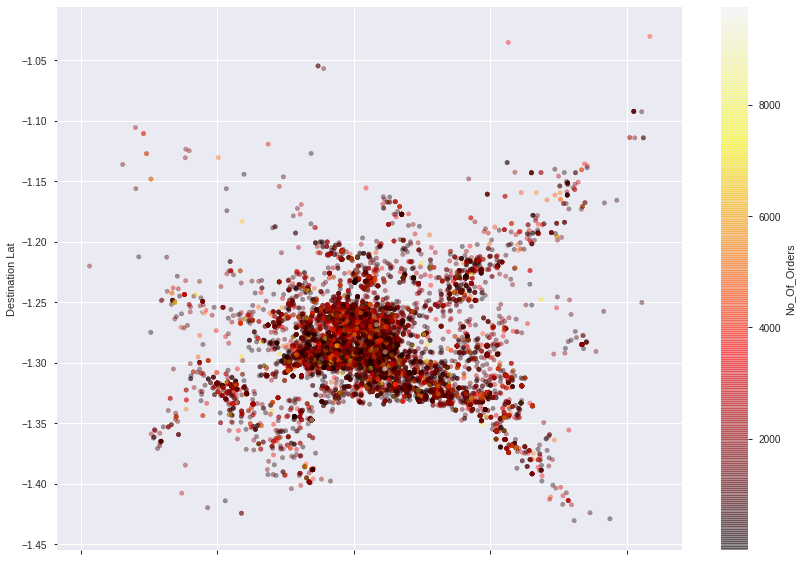

In [39]:
##GIS plot of Destination of product and No.of Orders
data_train_riders.plot(kind = "scatter", x = "Destination Long", y = "Destination Lat", alpha = 0.4,
             c = "No_Of_Orders", cmap = plt.get_cmap("hot"), figsize = (14, 10))

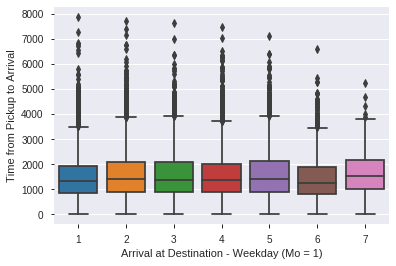

In [40]:
#Boxplot of Time from Pickup to Arrival and Arrival at Destination-Weekday
sns.boxplot(x="Arrival at Destination - Weekday (Mo = 1)", y="Time from Pickup to Arrival", data=data_train_riders)

# Question 3
• Check for missing values in the data. How many data are missing? <br>
• What percentage of the data is missing.   
• Are the missing values categorical or continuous values or both?   
• Do you think you should input the missing values or just delete the feature or observation for that missing       value?     
• How did you get to this conclusion?


Generating the profile report of the joint data using 'Pandas Profilling' will give a comprehensive report of the data set as done for the disjoint data.

In [ ]:
# Overview of the joint data
report_train_riders=pp.ProfileReport(data_train_riders)
report_train_riders

• From the report, there are 25,015 missing values forming (4.1%) of the data.  
• 20,649 of the missing values are for the feature 'Precipitation_in_millimeters', hence (97.4%) of the feature 'Precipitation_in_millimeters' is missing.  
• The feature 'Temperature' has 4366 (20.6%) missing values   
• The missing values are continous values.  
• I will delete the feature  'Precipitation_in_millimeters' because the vast majority(97.4%) of the that data is missing. Moreovere, the minimum of the data is 0.1 and     the Maximum is 99.1 with no zeros recorded. This means the missing values could simply mean non-recorded values hence it doesn't even sound adviceable to replace      the   missing values with even the mean(7.905797101) of that data field.   
• But for the feature 'Temperature', I will replace the missing values since a good percentage of the data is not missing.

In [176]:
#The missing data and its percentages could also be identified by
display(data_train_riders.isnull().sum(),
data_train_riders.isna().mean().round(4) * 100)

Order No                                         0
User Id                                          0
Vehicle Type                                     0
Platform Type                                    0
Personal or Business                             0
Placement - Day of Month                         0
Placement - Weekday (Mo = 1)                     0
Placement - Time                                 0
Confirmation - Day of Month                      0
Confirmation - Weekday (Mo = 1)                  0
Confirmation - Time                              0
Arrival at Pickup - Day of Month                 0
Arrival at Pickup - Weekday (Mo = 1)             0
Arrival at Pickup - Time                         0
Pickup - Day of Month                            0
Pickup - Weekday (Mo = 1)                        0
Pickup - Time                                    0
Arrival at Destination - Day of Month            0
Arrival at Destination - Weekday (Mo = 1)        0
Arrival at Destination - Time  

Order No                                      0.00
User Id                                       0.00
Vehicle Type                                  0.00
Platform Type                                 0.00
Personal or Business                          0.00
Placement - Day of Month                      0.00
Placement - Weekday (Mo = 1)                  0.00
Placement - Time                              0.00
Confirmation - Day of Month                   0.00
Confirmation - Weekday (Mo = 1)               0.00
Confirmation - Time                           0.00
Arrival at Pickup - Day of Month              0.00
Arrival at Pickup - Weekday (Mo = 1)          0.00
Arrival at Pickup - Time                      0.00
Pickup - Day of Month                         0.00
Pickup - Weekday (Mo = 1)                     0.00
Pickup - Time                                 0.00
Arrival at Destination - Day of Month         0.00
Arrival at Destination - Weekday (Mo = 1)     0.00
Arrival at Destination - Time  

In [177]:
#Imputing missing data in Temperature column - (Because it has less missing data (20.59%))
data_train_riders['Temperature']=data_train_riders['Temperature'].fillna(int(data_train_riders['Temperature'].median()))
data_train_riders.isna().mean().round(4) * 100

Order No                                      0.0
User Id                                       0.0
Vehicle Type                                  0.0
Platform Type                                 0.0
Personal or Business                          0.0
Placement - Day of Month                      0.0
Placement - Weekday (Mo = 1)                  0.0
Placement - Time                              0.0
Confirmation - Day of Month                   0.0
Confirmation - Weekday (Mo = 1)               0.0
Confirmation - Time                           0.0
Arrival at Pickup - Day of Month              0.0
Arrival at Pickup - Weekday (Mo = 1)          0.0
Arrival at Pickup - Time                      0.0
Pickup - Day of Month                         0.0
Pickup - Weekday (Mo = 1)                     0.0
Pickup - Time                                 0.0
Arrival at Destination - Day of Month         0.0
Arrival at Destination - Weekday (Mo = 1)     0.0
Arrival at Destination - Time                 0.0


In [178]:
#Deleting the Precipitation feature (Because of 97.4% missing data)
del data_train_riders['Precipitation in millimeters']
data_train_riders.isna().mean().round(4) * 100

Order No                                     0.0
User Id                                      0.0
Vehicle Type                                 0.0
Platform Type                                0.0
Personal or Business                         0.0
Placement - Day of Month                     0.0
Placement - Weekday (Mo = 1)                 0.0
Placement - Time                             0.0
Confirmation - Day of Month                  0.0
Confirmation - Weekday (Mo = 1)              0.0
Confirmation - Time                          0.0
Arrival at Pickup - Day of Month             0.0
Arrival at Pickup - Weekday (Mo = 1)         0.0
Arrival at Pickup - Time                     0.0
Pickup - Day of Month                        0.0
Pickup - Weekday (Mo = 1)                    0.0
Pickup - Time                                0.0
Arrival at Destination - Day of Month        0.0
Arrival at Destination - Weekday (Mo = 1)    0.0
Arrival at Destination - Time                0.0
Distance (KM)       

# Question 4
• What new features did you engineer with the data?     
• Explain the different steps used to engineer and encode the following features: datetime, coordinates,             categorical and numerical variables?

In [179]:
data_train_riders.columns=data_train_riders.columns.str.replace('_',' ')

##Dropping irrelevant features
data_train_riders.drop('Order No', axis=1, inplace=True)
data_train_riders.drop('User Id', axis=1, inplace=True)
data_train_riders.drop('Vehicle Type', axis=1, inplace=True)
data_train_riders.drop('Rider Id', axis=1, inplace=True)
data_train_riders.drop('Arrival at Destination - Day of Month', axis=1, inplace=True)
data_train_riders.drop('Arrival at Destination - Weekday (Mo = 1)', axis=1, inplace=True)
data_train_riders.drop('Arrival at Destination - Time', axis=1, inplace=True)

In [48]:
# Transform categorical variables into dummy variables  
#data_train_riders = pd.get_dummies(data_train_riders, drop_first=True)  # To avoid dummy trap


In [180]:
data_train_riders['Age'].describe()

count    21201.000000
mean       984.742842
std        646.652835
min         96.000000
25%        495.000000
50%        872.000000
75%       1236.000000
max       3764.000000
Name: Age, dtype: float64

Based on the distribution of the feature 'Age', a new feature is developed as 'Experience, where 'Age' values falling within the upper quartile gets a category ID of 0 to mean highly experienced, followed by the next level of experience with ID 1 being lower than that of the those with ID 0. The experience level with ID 1 represents 'Age' values within the middle quartile. The last set of the experience feature is of ID 2, representing the 'Age' values in the lower quartile.

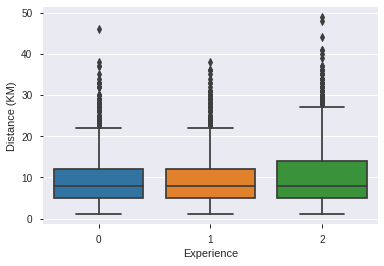

In [181]:
#Converting Age feature to Experience Feature
def age_groups(age):
    if age < 495:
        return 0
    elif 495 <= age <= 872:
        return 1
    elif age > 872:
        return 2

data_train_riders['Experience'] = data_train_riders['Age'].apply(age_groups)
sns.boxplot(x='Experience', y="Distance (KM)", data=data_train_riders)


In [182]:
data_train_riders['Distance (KM)'].describe()
#Similar to the Experience feature, another feature is generated to classify the distances into near, far and very far as Distance_type using the Distance feature.

count    21201.000000
mean         9.506533
std          5.668963
min          1.000000
25%          5.000000
50%          8.000000
75%         13.000000
max         49.000000
Name: Distance (KM), dtype: float64

count    21201.000000
mean         0.362294
std          0.506291
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Distance_Type, dtype: float64

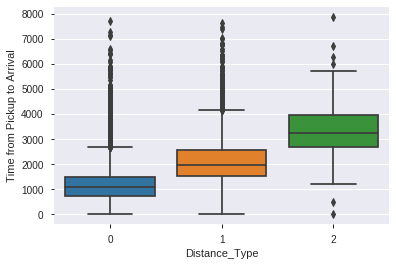

In [183]:
#Converting Distance feature to Distance_Type (Near-0, Far-1, VeryFar-2)
def dist_type(distance):
    if distance <= 10:
        return 0
    elif  10 <= distance <= 25:
        return 1
    elif distance > 25:
        return 2

data_train_riders['Distance_Type'] = data_train_riders['Distance (KM)'].apply(dist_type)
sns.boxplot(x="Distance_Type", y="Time from Pickup to Arrival", data=data_train_riders)
data_train_riders['Distance_Type'].describe()


# Question 5
• Take the training data from the Zindi challenge and split it into 80% train set and 20% test set. Use random       seed = 42.  
• Train a multiple linear regression on the training data without the features you engineered. What is the           training RMSE? What is the MSE when you predict the ETA with the 20% test data?   
• Train a multiple linear regression on the training data and include the features you engineered. What is the       training RMSE? What is the MSE when you predict the ETA with the 20% test data? 

In [184]:
##Defining Predictor and Response dataframe
#Taking target variable from train dataframe

X =pd.DataFrame(data_train_riders[['Platform Type','Distance (KM)','No Of Orders','Age','No of Ratings']])
Y = pd.DataFrame(data_train_riders['Time from Pickup to Arrival'])
X_data_train_set,X_data_test_set, Y_data_train_set, Y_data_test_set= train_test_split(X,Y, test_size = 0.2, random_state = 42)


In [185]:
X_data_train_set.shape

(16960, 5)

In [104]:
Y_data_train_set.shape

(16960, 1)

In [105]:
X_data_test_set.shape

(4241, 5)

In [106]:
 Y_data_test_set.shape

(4241, 1)

## Multiple Linear Regression with the engineered features

In [186]:
#Multiple Regression
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

#Fitting model
lm = linear_model.LinearRegression()
lm.fit(X_data_train_set,Y_data_train_set)
#Predicting with model
Intercept=lm.intercept_
coefficient=lm.coef_
#predicting with Testing_data
#X_data_test_set=pd.DataFrame(data_test_riders)
y_pred=lm.predict(X_data_train_set)


#Model Evaluation with mse
MSE=mean_squared_error(Y_data_train_set, y_pred)


#Model Evaluation with rmse
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse_val = rmse(np.array(Y_data_train_set), np.array(y_pred))
rmse_val

#Model Evaluation with mape
def mean_absolute_percent_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100
mape=mean_absolute_percent_error(Y_data_train_set,y_pred)
mape
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('MSE: %.4f' %MSE)
print('RMSE: %.4f' %rmse_val)
print('MAPE: %.4f' %mape)

## View fisrt ten predicted Values
y_pred[:10].round()

Method: Simple Linear Regression
MSE: 642586.0980
RMSE: 801.6147
MAPE: 1060.0163


array([[1739.],
       [1345.],
       [2172.],
       [2430.],
       [1296.],
       [1294.],
       [1419.],
       [1788.],
       [1529.],
       [1155.]])

## Multiple Linear Regression with the engineered features

In [187]:
XF =pd.DataFrame(data_train_riders[['Platform Type','Distance (KM)','No Of Orders','Age','No of Ratings','Experience','Distance_Type']])
YF = pd.DataFrame(data_train_riders['Time from Pickup to Arrival'])
XF_data_train_set,XF_data_test_set, YF_data_train_set, YF_data_test_set= train_test_split(XF,YF, test_size = 0.2, random_state = 42)

#Fitting model
lm = linear_model.LinearRegression()
lm.fit(XF_data_train_set,YF_data_train_set)

#Predicting with model
Intercept=lm.intercept_
coefficient=lm.coef_

#predicting with Testing_data
XF_data_test_set=pd.DataFrame(data_test_riders)
yF_pred=lm.predict(XF_data_train_set)


#Model Evaluation with mse
MSE_F=mean_squared_error(YF_data_train_set, yF_pred)


#Model Evaluation with rmse
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean())
rmse_val_F = rmse(np.array(YF_data_train_set), np.array(yF_pred))
rmse_val_F

#Model Evaluation with mape
def mean_absolute_percent_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100
mape_F =mean_absolute_percent_error(YF_data_train_set,yF_pred)
mape_F

method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('MSE: %.4f' %MSE_F)
print('RMSE: %.4f' %rmse_val_F)
print('MAPE: %.4f' %mape_F)

## View fisrt ten predicted Values
yF_pred[:10].round()

Method: Simple Linear Regression
MSE: 641751.9487
RMSE: 801.0942
MAPE: 1055.7577


array([[1696.],
       [1371.],
       [2167.],
       [2451.],
       [1344.],
       [1327.],
       [1439.],
       [1740.],
       [1543.],
       [1154.]])

# Question 6
• Train a Lasso, Ridge and Elastic Regression on the 80% train set (with the engineered features).    
• What hyperparameters did you use? What is the training RMSE?   
• What is the MSE when you predict the ETA with the 20% test data?   


In [189]:
#Ridge Regression
from sklearn.datasets import make_regression
from sklearn.linear_model import Ridge
# Create linear regression object with a ridge coefficient 0.5
ridge = Ridge(fit_intercept=True, alpha=0.5)

# Train the model using the training set
ridge.fit(XF_data_train_set,YF_data_train_set)
#predicting with Testing_data
yf_predict=ridge.predict(XF_data_train_set)
## View fisrt ten predicted Values
yf_predict[:10].round()

array([[1696.],
       [1371.],
       [2167.],
       [2451.],
       [1344.],
       [1327.],
       [1439.],
       [1740.],
       [1542.],
       [1154.]])

In [190]:
#Lasso Regression
from sklearn.linear_model import Lasso
#X_train=pd.DataFrame(data_train_riders[['Distance (KM)','No_Of_Orders','Age','No_of_Ratings','Personal or Business_Personal','Experience','Distance_Type']])
#Y_train=pd.DataFrame(data_train_riders['Time from Pickup to Arrival'])
# Create linear regression object with a lasso coefficient 0.5
lasso = Lasso(fit_intercept=True, alpha=0.5)

# Train the model using the training set
lasso.fit(XF_data_train_set,YF_data_train_set)
#predicting with Testing_data
#X_test=pd.DataFrame(data_train_riders[['Distance (KM)','No_Of_Orders','Age','No_of_Ratings','Personal or Business_Personal','Experience','Distance_Type']])
y_predict=ridge.predict(XF_data_train_set)
## View fisrt ten predicted Values
y_predict[:10].round()

array([[1696.],
       [1371.],
       [2167.],
       [2451.],
       [1344.],
       [1327.],
       [1439.],
       [1740.],
       [1542.],
       [1154.]])

In [191]:
#ElasticNet Regression
from sklearn.linear_model import ElasticNet
# Create linear regression object with a ElasticNet coefficient 0.5
elastic_net = ElasticNet(fit_intercept=True, alpha=0.5)

# Train the model using the training set
elastic_net.fit(XF_data_train_set,YF_data_train_set)
#predicting with Testing_data
#X_test=pd.DataFrame(data_train_riders[['Distance (KM)','No_Of_Orders','Age','No_of_Ratings','Personal or Business_Personal','Experience','Distance_Type']])
y_predict=ridge.predict(XF_data_train_set)
## View fisrt ten predicted Values
y_predict[:10].round()

array([[1696.],
       [1371.],
       [2167.],
       [2451.],
       [1344.],
       [1327.],
       [1439.],
       [1740.],
       [1542.],
       [1154.]])

# Question 7
• Now choose your best algorithm from multiple linear regression, lasso regression, ridge regression and elastic net.    
• Training this algorithm with 100% training data. Predict the ETA using the test data provided. Upload your solution for the Zindi challenge.

In [214]:
X_data_trained = pd.DataFrame( data_train_riders[['Platform Type','Distance (KM)','No Of Orders','Age','No of Ratings','Experience','Distance_Type']])
Y_data_trained =  pd.DataFrame( data_train_riders[["Time from Pickup to Arrival"]])


#ElasticNet Regression
from sklearn.linear_model import ElasticNet
# Create linear regression object with a ElasticNet coefficient 0.5
elastic_net = ElasticNet(fit_intercept=True, alpha=0.5)

# Train the model using the training set
elastic_net.fit(X_data_trained,Y_data_trained)
#predicting with Testing_data
#X_test=pd.DataFrame(data_train_riders[['Distance (KM)','No_Of_Orders','Age','No_of_Ratings','Personal or Business_Personal','Experience','Distance_Type']])
y_predict=ridge.predict(X_data_train)
## View fisrt ten predicted Values
print(y_predict[:10].round())



y_vals=pd.DataFrame(y_pred.round())
my_columns = ["Time from Pickup to Arrival"]
y_vals.columns = my_columns
y_vals
Testing_data=data_train.merge(data_riders, on='Rider Id')
Order_Id=pd.DataFrame(Testing_data['Order No'])
Order_Id
Submission=pd.concat([Order_Id,y_vals], axis=1, ignore_index=True)
export_csv = Submission.to_csv (r'export_dataframe.csv', index = None, header=True) 

[[1696.]
 [1371.]
 [2167.]
 [2451.]
 [1344.]
 [1327.]
 [1439.]
 [1740.]
 [1542.]
 [1154.]]


# Question 8
• Do you think there are more stuff you can do with your data. Explore and enjoy. This is a bonus question.

Yes,   
I can extract the hour of the day deliveries are made since my times are in pandas datetime. This could be helpful in determiningg the waiting time between the times of placement confirmation and the time  of pickup by the rider. For instance, assuming the order was comfirmed in a later hour in a day when the delivery has to be made early the next day, then the ETA could be huge and might look bad if we dont consider the hour of the day the order got comfirmed.    